# 영역 레이블링(Region Labeling)

영역(혹은, connected component)이란 각 픽셀들이 서로 다른 픽셀들과 연결되어 있는 픽셀들의 집합을 의미하는 것

영상을 스캔하여 픽셀 간의 연결성을 살펴보고 연결되어 있는 픽셀들을 같은 영역으로 그룹화 한 것을 말함

영역 레이블링 알고리즘은 픽셀들의 연결성을 체크하여 모든 연결된 영역을 찾고, 같은 영역에 해당하는 모든 픽셀에 각각 다른 레이블(고유한 번호) 값을 설정하는 방법

레이블맵, 바운딩 박스, 픽셀 개수, 무게 중심 좌표를 반환

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

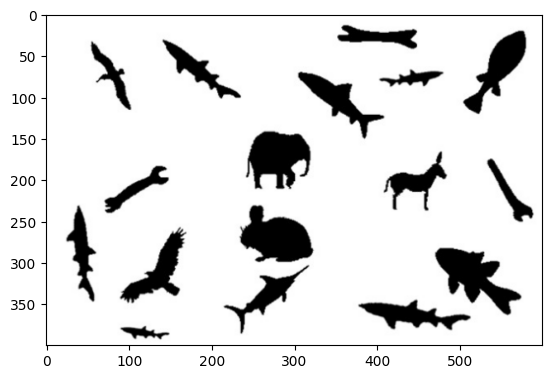

In [6]:
# 1. 이미지를 불러온다
img = cv2.imread('../images/Target.bmp')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# 2. 흰색과 검은색으로 이루어진 이미지를 이진화한다
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 이미지를 그레이스케일로 변환 (BGR -> 그레이스케일)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY) # 이미지의 픽셀값을 기준으로 128 이상이면 흰색(255), 아니면 검은색(0)으로 이진화 (threshold 적용)
img = cv2.bitwise_not(img) # 이미지의 색상을 반전 (흑백을 반전시켜 흰색은 검은색으로, 검은색은 흰색으로 변경)

# 3. 레이블링 함수 사용하여 객체를 구분한다
n, label = cv2.connectedComponents(img) # 연결된 구성 요소를 식별하고 레이블링 (연결된 영역의 개수 `n`과 레이블 맵 `label`을 반환)

print(n) # 레이블 개수 출력
print(label[19]) # 19번 레이블의 픽셀값 출력

# 4. 레이블링 결과를 시각화한다
colors = [] # 시각화에 사용할 색상 리스트 초기화

for i in range(n):  # 각 레이블에 사용할 색상값을 `[0, 0, 0]`으로 설정 (기본은 검은색)
    colors.append(np.array([0, 0, 0]))

colors[0] = np.array([0, 0, 0]) # 배경 레이블(0번)에 검은색을 할당

# 각 객체에 무작위 RGB 색상을 할당 (배경 제외, 1번 레이블부터 시작)
for i in range(1, n):
    colors[i] = np.random.randint(0, 256, 3)

# 색상 리스트를 NumPy 배열로 변환 (타입은 `uint8`)
colors = np.array(colors, dtype=np.uint8)

# 레이블 맵을 색상으로 치환해 시각화된 결과 이미지 생성
result = colors[label]

18
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
for i in range(400):
    print(label[i])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

IndexError: index 400 is out of bounds for axis 0 with size 400

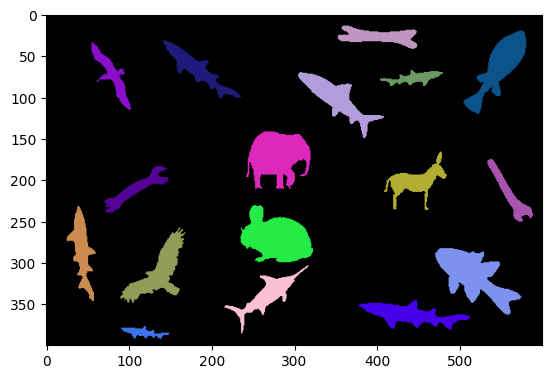

In [9]:
# 5. 결과 이미지를 출력한다
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# 1. 이미지를 불러온다
img = cv2.imread('../images/Target.bmp')

nlabels =  18
labels =  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
stats =  [[     0      0    600    400 207621]
 [   353     14     96     28   1374]
 [   505     20     76    101   2711]
 [   141     31     95     71   1582]
 [    55     34     48     82   1037]
 [   404     67     76     20    658]
 [   305     70    104     80   2250]
 [   242    142     78     69   3560]
 [   409    166     76     71   1592]
 [   534    175     55     76    986]
 [    71    184     77     56   1129]
 [   235    231     88     69   3826]
 [    25    232     35    115   1526]
 [    90    258     79     91   2365]
 [   471    283    104     81   3704]
 [   216    304    102     82   1607]
 [   378    346    135     36   2071]
 [    91    377     58     16    401]]
centroids =  [[294.98739049 197.42807808]
 [402.50800582  26.82751092]
 [547.54260421  64.30062707]
 [182.60303413  66.64348925]
 [ 79.41080039  73.74445516]
 [44

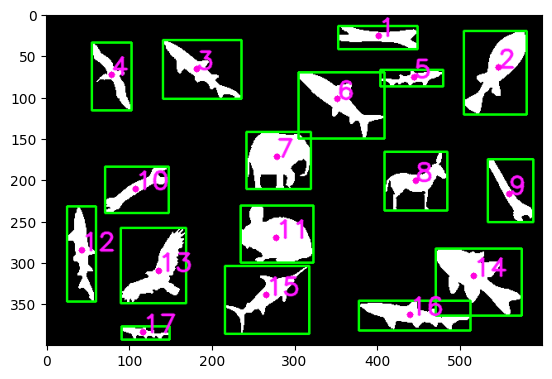

In [11]:
# 2. 흰색과 검은색으로 이루어진 이미지를 이진화한다 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.bitwise_not(img)

# 3. 영역 레이블링 수행
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img)

# 4. 레이블링 정보
print('nlabels = ', nlabels) # 연결된 영역의 개수 (배경 포함)
print('labels = ', labels) # 각 픽셀에 대해 레이블 값을 갖는 2차원 배열
print('stats = ', stats) # 각 레이블링 영역의 바운딩 박스 정보
print('centroids = ', centroids) # 각 레이블링 영역의 무게 중심 좌표

# 5. 레이블링 정보를 이용하여 바운딩 박스와 중심점을 시각화
dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) # 이진화 이미지를 컬러 이미지로 변환

for i in range(1, nlabels): # 배경 레이블(0번) 제외
    x, y, width, height, area = stats[i] # 바운딩 박스 정보
    cx, cy = centroids[i] # 중심점 좌표

    # 바운딩 박스 그리기
    cv2.rectangle(dst, (x, y), (x+width, y+height), (0, 255, 0), 2)

    # 중심점에 숫자 부여 및 그리기
    cv2.putText(dst, str(i), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 22, 255), 2, cv2.LINE_AA)
    cv2.circle(dst, (int(cx), int(cy)), 4, (222, 2, 255), -1)

# 6. 결과 이미지 출력
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
# 영역 레이블링은 어떤 알고리즘을 사용하는가 ?
# OpenCV에서는 레이블링을 위한 함수로 `cv2.connectedComponents()`와 `cv2.connectedComponentsWithStats()`를 제공한다.
# `cv2.connectedComponents()` 함수는 연결된 구성 요소를 식별하고 레이블링을 수행한다.
# `cv2.connectedComponentsWithStats()` 함수는 `cv2.connectedComponents()` 함수와 동일한 기능을 수행하며, 추가로 레이블링된 영역의 통계 정보를 반환한다.
# 레이블링 알고리즘은 주로 `Union-Find` 알고리즘을 기반으로 한다. 이 알고리즘은 이미지의 픽셀을 순회하며 연결된 픽셀을 찾아 같은 레이블을 할당한다.
# 레이블링 알고리즘은 이미지의 픽셀을 순회하며 연결된 픽셀을 찾아 같은 레이블을 할당한다.
# 이때, 연결된 픽셀을 찾기 위해 4-방향 또는 8-방향 이웃을 검사한다.
# 순차적 알고리즘은 사용하나 ? OpenCV의 레이블링 함수는 순차적 알고리즘을 사용하지 않는다.
# 그럼 어떤 알고리즘인가 ? OpenCV의 레이블링 함수는 `Union-Find` 알고리즘을 사용한다.
# 차이는 ?
# 순차적 알고리즘은 픽셀을 순차적으로 검사하며 연결된 픽셀을 찾아 레이블을 할당하는 방식이다.
# 반면, `Union-Find` 알고리즘은 픽셀을 순차적으로 검사하지 않고, 이미지의 픽셀을 효율적으로 관리하여 연결된 픽셀을 찾아 레이블을 할당한다.
# 어떤 알고리즘을 사용하는 것이 좋은가 ? `Union-Find` 알고리즘을 사용하는 것이 좋다. `Union-Find` 알고리즘은 효율적으로 연결된 픽셀을 찾아 레이블을 할당할 수 있기 때문이다.

In [13]:
# 영역 레이블링 순차적 알고리즘

def sequential_labeling(image):
    # 초기 레이블 설정
    current_label = 1
    equivalence_table = {}
    rows, cols = image.shape

    # 1단계: 영상을 좌측에서 우측으로, 위에서 아래로 스캔
    labeled_image = np.zeros_like(image, dtype=int)

    # 이웃 픽셀의 상대 좌표 (위쪽 픽셀, 왼쪽 픽셀)
    
    # 8-방향 연결성을 사용하는 경우
    neighbors = [(-1, 0), (0, -1), (-1, -1), (-1, 1)]
    
    # 4-방향 연결성을 사용하는 경우
    # neighbors = [(-1, 0), (0, -1)]

    for r in range(rows):
        for c in range(cols):
            if image[r, c] != 0:  # 현재 픽셀이 0이 아니면 객체임
                neighbor_labels = []

                # 2단계: 위쪽과 왼쪽 이웃 픽셀의 레이블 확인
                for dr, dc in neighbors:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < rows and 0 <= nc < cols and labeled_image[nr, nc] > 0:
                        neighbor_labels.append(labeled_image[nr, nc])

                if not neighbor_labels:
                    # 2-3: 이웃에 레이블이 없으면 새로운 레이블 할당
                    labeled_image[r, c] = current_label
                    equivalence_table[current_label] = current_label
                    current_label += 1
                else:
                    # 2-1: 이웃 중 최소 레이블 할당
                    min_label = min(neighbor_labels)
                    labeled_image[r, c] = min_label

                    # 2-3: 이웃 레이블이 서로 다르면 등가 테이블에 기록
                    for label in neighbor_labels:
                        if label != min_label:
                            equivalence_table[max(label, min_label)] = min_label

    # 3단계: 등가 테이블 정리 (등가 테이블을 통해 최종 레이블 매핑 결정)
    for key in equivalence_table.keys():
        root = key
        while equivalence_table[root] != root:
            root = equivalence_table[root]
        equivalence_table[key] = root

    # 4단계: 수정된 등가 테이블을 사용하여 레이블 영상 수정
    for r in range(rows):
        for c in range(cols):
            if labeled_image[r, c] > 0:
                labeled_image[r, c] = equivalence_table[labeled_image[r, c]]

    # 5단계: 등가 테이블을 레이블이 순차적으로 증가하도록 재정렬 (선택적)
    unique_labels = np.unique(labeled_image[labeled_image > 0])
    new_labels = {old: new for new, old in enumerate(unique_labels, start=1)}

    # 6단계: 최종 정렬된 레이블을 사용하여 이미지 수정
    for r in range(rows):
        for c in range(cols):
            if labeled_image[r, c] > 0:
                labeled_image[r, c] = new_labels[labeled_image[r, c]]

    return labeled_image

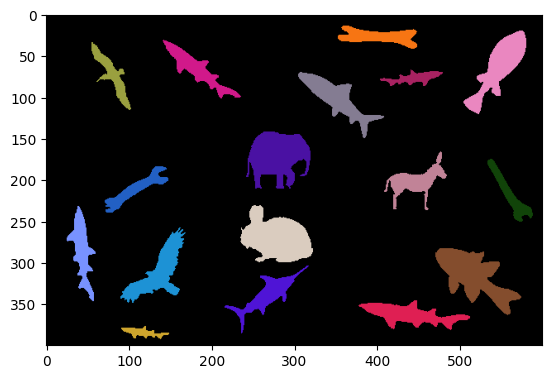

In [14]:
# 직접 구현한 함수를 이용한 레이블링 수행
labeled_image = sequential_labeling(img)

# 레이블링 결과 객체마다 다른 색으로 시각화
colors = np.random.randint(0, 256, (np.max(labeled_image)+1, 3), dtype=np.uint8)
colors[0] = [0, 0, 0]

result = colors[labeled_image]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()